# Data preprocessing

Import Libararies

In [84]:
import pandas as pd
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

Dataset

In [56]:
df = pd.read_csv('Emotions_training.csv')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


Dataset

In [57]:
df['clean_text'] = df['text'].str.lower()
df.head()

,text,label,clean_text
0,i didnt feel humiliated,0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,3,i am feeling grouchy


Removing Links

In [58]:
df['text'] = df['text'].fillna('')

In [59]:
no_url=[]
for sentence in df["text"]:
    no_url.append(re.sub(r"http\S+", "", sentence))
df["text"]=no_url
df.head()

,text,label,clean_text
0,i didnt feel humiliated,0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,3,i am feeling grouchy


Remove next lines

In [60]:
df['text'] = df['text'].str.replace('\n','')

Remove next lines using replace() method

In [61]:
def remove_newlines(text):
    return text.replace('\n', '')

# Define the text variable
text = "\nIt contains newlines.\nThese should be removed."

# Call the function with the defined text
clean_text = remove_newlines(text)

# Print the result
print(clean_text)

It contains newlines.These should be removed.


Words containing numbers

In [62]:
import re
def find_words_with_numbers(text):
    pattern = r'\b\w*\d\w*\b'  
    words_with_numbers = re.findall(pattern, text)

    return words_with_numbers
words_with_numbers = find_words_with_numbers(text)
print(words_with_numbers)

[]


Extra spaces

In [63]:
def remove_extra_spaces(text):
    return ' '.join(text.split())

text = "  "
clean_text = remove_extra_spaces(text)
print(clean_text)

Special characters

In [64]:
no_special_char=[]
for sentence in df.text:
    no_special_char.append(re.sub('[^A-Za-z0-9]+','', sentence))
df["text"]=no_special_char

Removal of stop words

In [65]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gouthamyadav007/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [68]:
def remove_stopwords(text):
    tokens = text.split()
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return ''.join(filtered_text)

In [69]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [70]:
df['text'] = df['text'].apply(remove_stopwords)

Stemming

In [71]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gouthamyadav007/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
df['text'] = df['text'].apply(lambda text: ' '.join([stemmer.stem(word) for word in word_tokenize(text)]))

Lemmatization

In [74]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [75]:
nlp = spacy.load('en_core_web_sm')

In [76]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [77]:
df['text'] = df['text'].apply(lemmatize_text)

In [79]:
print(df['text'])

0                                         ididntfeelhumili
1        icangofromfeelingsohopelesstosodamnedhopefulju...
2                  imgrabbingaminutetopostifeelgreedywrong
3        iameverfeelingnostalgicaboutthefireplaceiwillk...
4                                        iamfeelinggrouchi
                               ...                        
15995    ijusthadaverybrieftimeinthebeanbagandisaidtoan...
15996    iamnowturningandifeelpatheticthatiamstillwaiti...
15997                             ifeelstrongandgoodoveral
15998       ifeellikethiswassucharudecommentandimgladthatt
15999     iknowalotbutifeelsostupidbecauseicannotportrayit
Name: text, Length: 16000, dtype: object


# Featuring Engineering

In [80]:
# Step 1: Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Load your dataset
df = pd.read_csv('Emotions_training.csv')

# Step 3: Extract the text data from the dataset
corpus = df['text'].tolist()

# Step 4: Use TfidfVectorizer to vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Step 5: Print the resulting TF-IDF matrix
print("Feature names:", vectorizer.get_feature_names_out())
print("TF-IDF matrix:\n", X.toarray())


# Optional: If you want to see the matrix in a more readable format (like a DataFrame)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF DataFrame:\n", df_tfidf)
print("The count of sadness is:", len(label_dict[0]))
print("The count of joy is:", len(label_dict[1]))
print("The count of love is:", len(label_dict[2]))
print("The count of anger is:", len(label_dict[3]))
print("The count of fear is:", len(label_dict[4]))
print("The count of surprise is:", len(label_dict[5]))

Feature names: ['aa' 'aaaaaaand' 'aaaaand' ... 'zum' 'zumba' 'zz']
TF-IDF matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

TF-IDF DataFrame:
         aa  aaaaaaand  aaaaand  aaaand  aac  aahhh  aaron   ab  abandon  \
0      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   
1      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   
2      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   
3      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   
4      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   
...    ...        ...      ...     ...  ...    ...    ...  ...      ...   
15995  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   
15996  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   
15997  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0    

In [87]:
df = pd.read_csv('Emotions_training.csv')  # Adjust the file path as needed

# Verify the data is loaded correctly
print("First few rows of the dataset:\n", df.head())
print("Data types:\n", df.dtypes)
print("Unique values in the 'label' column:", df['label'].unique())

# Check for missing data and handle them by dropping any rows with missing values
df = df.dropna(subset=['label', 'text'])

# Creating dictionaries to hold text for each label
label_dict = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

# This for loop helps in appending each sample/data into the respective labels array based on the if conditions
for lbl, txt in zip(df['label'], df['text']):
    if lbl in label_dict:
        label_dict[lbl].append(txt)

# Displaying the length of each label
print("The count of sadness is:", len(label_dict[0]))
print("The count of joy is:", len(label_dict[1]))
print("The count of love is:", len(label_dict[2]))
print("The count of anger is:", len(label_dict[3]))
print("The count of fear is:", len(label_dict[4]))
print("The count of surprise is:", len(label_dict[5]))

First few rows of the dataset:
                                                 text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
Data types:
 text     object
label     int64
dtype: object
Unique values in the 'label' column: [0 3 2 5 4 1]
The count of sadness is: 4666
The count of joy is: 5362
The count of love is: 1304
The count of anger is: 2159
The count of fear is: 1937
The count of surprise is: 572


First few rows of the dataset:
                                                 text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
Data types:
 text     object
label     int64
dtype: object
Unique values in the 'label' column: [0 3 2 5 4 1]
The percentage of label 1 is 33.51% (Count: 5362)
The percentage of label 0 is 29.16% (Count: 4666)
The percentage of label 3 is 13.49% (Count: 2159)
The percentage of label 4 is 12.11% (Count: 1937)
The percentage of label 2 is 8.15% (Count: 1304)
The percentage of label 5 is 3.57% (Count: 572)


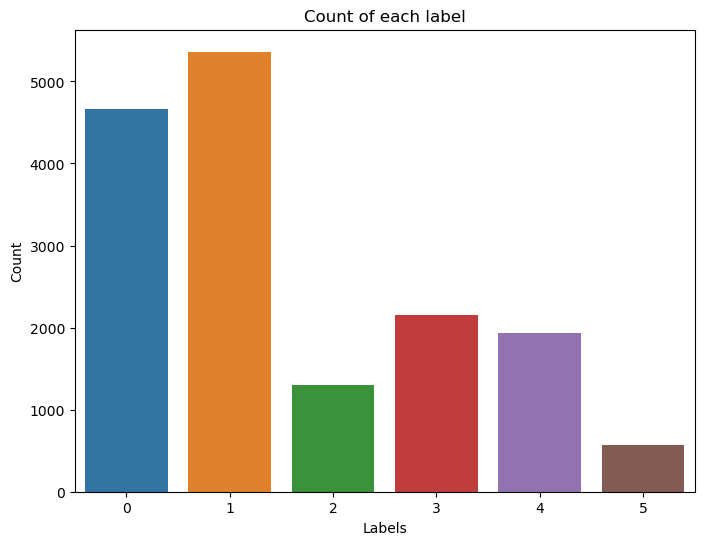

Training set size: 11200 (70.00%)
Validation set size: 1600 (10.00%)
Test set size: 3200 (20.00%)


In [88]:
df = pd.read_csv('Emotions_training.csv')  

# Verify the data is loaded correctly
print("First few rows of the dataset:\n", df.head())
print("Data types:\n", df.dtypes)
print("Unique values in the 'label' column:", df['label'].unique())

df = df.dropna(subset=['label', 'text'])

# Function to calculate and display label counts and percentages
def calculate_label_stats(df):
    label_counts = df['label'].value_counts()
    total_count = len(df)
    
    for label, count in label_counts.items():
        percentage = (count / total_count) * 100
        print(f"The percentage of label {label} is {percentage:.2f}% (Count: {count})")

    return label_counts

# Calculate and display label statistics
label_counts = calculate_label_stats(df)

# Visualizing the counts of each label
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Count of each label')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Splitting the dataset
def split_dataset(df, test_size=0.2, val_size=0.1, random_state=42):
    train_val_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['label'])
    train_df, val_df = train_test_split(train_val_df, test_size=val_size/(1-test_size), random_state=random_state, stratify=train_val_df['label'])
    
    return train_df, val_df, test_df

# Split the dataset
train_df, val_df, test_df = split_dataset(df)

# Print the sizes and percentages of each split
total_size = len(df)
print(f'Training set size: {len(train_df)} ({len(train_df) / total_size * 100:.2f}%)')
print(f'Validation set size: {len(val_df)} ({len(val_df) / total_size * 100:.2f}%)')
print(f'Test set size: {len(test_df)} ({len(test_df) / total_size * 100:.2f}%)')

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('Emotions_training.csv')  

# Verify the data is loaded correctly
print("First few rows of the dataset:\n", df.head())
print("Data types:\n", df.dtypes)
print("Unique values in the 'label' column:", df['label'].unique())

# Check for missing data and handle them by dropping any rows with missing values
df = df.dropna(subset=['label', 'text'])

# Splitting the dataset
# First, split off the test set (20% of the data)
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Then split the remaining data into training (70% of original) and validation sets (10% of original)
train_df, val_df = train_test_split(train_val_df, test_size=0.125, random_state=42, stratify=train_val_df['label'])
# 0.125 * 0.8 = 0.1, so validation set is 10% of the original dataset

# Printing the sizes and percentages of each split
total_size = len(df)
train_size = len(train_df)
val_size = len(val_df)
test_size = len(test_df)

print(f'Training set size: {train_size} ({train_size / total_size * 100:.2f}%)')
print(f'Validation set size: {val_size} ({val_size / total_size * 100:.2f}%)')
print(f'Test set size: {test_size} ({test_size / total_size * 100:.2f}%)')

First few rows of the dataset:
                                                 text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
Data types:
 text     object
label     int64
dtype: object
Unique values in the 'label' column: [0 3 2 5 4 1]
Training set size: 11200 (70.00%)
Validation set size: 1600 (10.00%)
Test set size: 3200 (20.00%)


In [98]:
from sklearn.utils import resample

class_counts = df['label'].value_counts()

# target count using maximum count among all the label
target_count = class_counts.max()


resampled_data = []

# Loop through each class
for label in class_counts.index:
    # Extract data for the current class
    class_data = df[df['label'] == label]

    # Upsample (oversample) the class to match the target count
    sampled_data = resample(class_data, replace=True, n_samples=target_count, random_state=42)

    # Append the resampled data to the list
    resampled_data.append(sampled_data)

# Concatenate the resampled data for all classes
balanced_df = pd.concat(resampled_data)

# Displaying the count of samples in each class after balancing the dataset classes
print(balanced_df['label'].value_counts())

label
1    5362
0    5362
3    5362
4    5362
2    5362
5    5362
Name: count, dtype: int64


In [99]:
balanced_df

,text,label
2491,i feel glad that justice will be served west said,1
15585,i feel really valuable because of this knowing...,1
15488,i certainly have never felt it was appropriate...,1
11161,i feel assured that the future of online enter...,1
9145,i feel so thankful i have been able to figure ...,1
...,...,...
15825,i even feel it is a game that i am a part of s...,5
5319,i was talking to my district leader elder hill...,5
4775,i know this isnt real but it feels strange to ...,5
1756,i feel kinda strange too cause i didnt encount...,5


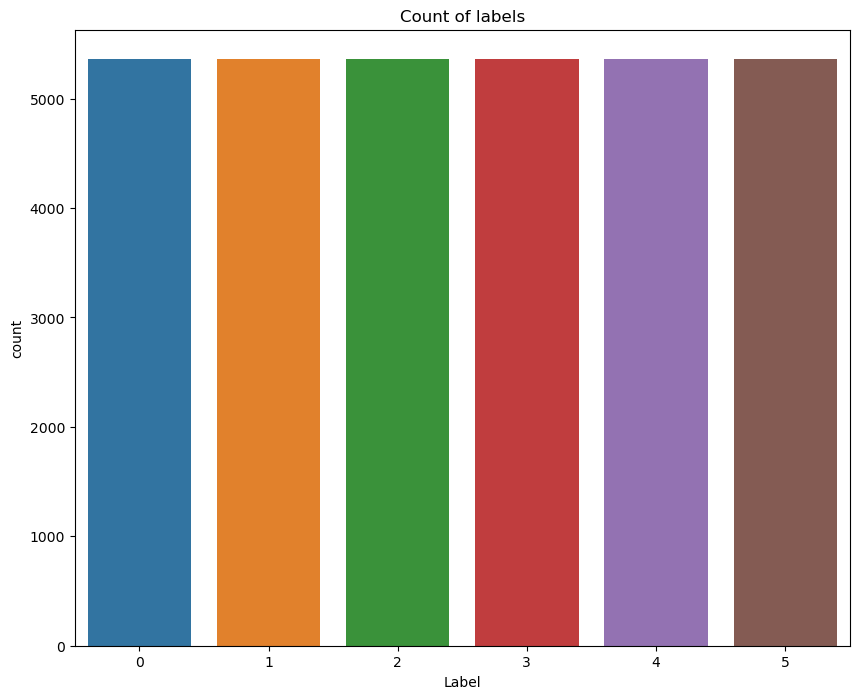

In [113]:
plt.figure(figsize=(10, 8))
sns.countplot(x='label', data=balanced_df)
plt.title('Count of labels')
plt.ylabel('count')
plt.xlabel('Label')
plt.show()
balanced_df['text'].fillna('', inplace=True)

# Model Building


1. Dividing the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.

In [112]:
# Defining the features (X) and target (y)
X = balanced_df['text'].values
y = balanced_df['label'].values

# First split the dataset into Train 70%
train_size = 0.7
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=42)

# Calculate remaining size for validation and test sets
remaining_size = 1 - train_size
validation_test_size = remaining_size / 2

# Split the combined Test-Validation into Test 20% and Validation 10%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=validation_test_size, random_state=42)

# Printing the sizes of the splits
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 22520
Validation set size: 8204
Test set size: 1448


# classification models